# Análise COVID-19

## Bibliotecas

In [1]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

## DataFrame

In [2]:
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              26713 non-null  int64         
 1   ObservationDate  26713 non-null  datetime64[ns]
 2   Province/State   12882 non-null  object        
 3   Country/Region   26713 non-null  object        
 4   Last Update      26713 non-null  datetime64[ns]
 5   Confirmed        26713 non-null  float64       
 6   Deaths           26713 non-null  float64       
 7   Recovered        26713 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 1.6+ MB


In [4]:
df.describe().drop(columns='SNo').T

,count,mean,std,min,25%,50%,75%,max
Confirmed,26713.0,5690.647550,23417.369124,0.0,18.0,192.0,1350.0,352845.0
Deaths,26713.0,373.353236,2214.074387,0.0,0.0,3.0,28.0,35341.0
Recovered,26713.0,1736.979224,10864.727709,0.0,0.0,8.0,187.0,289392.0


In [5]:
df.describe(include='O').T

,count,unique,top,freq
Province/State,12882,354,Diamond Princess cruise ship,175
Country/Region,26713,223,US,4990


In [6]:
#Alterar nomes das colunas:
df.columns = [re.sub(r'[/ ]', '_', col).lower() for col in df.columns]

In [7]:
df.sample(4)

,sno,observationdate,province_state,country_region,last_update,confirmed,deaths,recovered
826,827,2020-02-05,NaN,Nepal,2020-01-31 08:15:53,1.0,0.0,0.0
17356,17357,2020-04-21,Vermont,US,2020-04-21 23:39:09,818.0,40.0,0.0
1904,1905,2020-02-20,NaN,Germany,2020-02-18 17:03:03,16.0,0.0,12.0
1874,1875,2020-02-20,Jiangsu,Mainland China,2020-02-20 12:53:02,631.0,0.0,356.0


## Análise dos casos de Covid-19 no Brasil

In [8]:
#df.loc[df.country_region == 'Brazil', 'province_state'].notnull().sum()
df.loc[df.country_region == 'Brazil'].notnull().sum()

sno                85
observationdate    85
province_state      0
country_region     85
last_update        85
confirmed          85
deaths             85
recovered          85
dtype: int64

In [9]:
df_brasil = df.loc[df.country_region == 'Brazil'].drop(columns=['province_state','sno'])
df_brasil

,observationdate,country_region,last_update,confirmed,deaths,recovered
82,2020-01-23,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2020-02-26,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2020-02-27,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2020-02-28,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2020-02-29,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...
24850,2020-05-15,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,2020-05-16,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,2020-05-17,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,2020-05-18,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


### Número de casos confirmados

In [10]:
df_brasil = df_brasil[df_brasil.confirmed > 0]
df_brasil.shape

(84, 6)

In [11]:
fig = px.line(df_brasil, x='observationdate', y='confirmed',
        labels={'observationdate':'Data', 'confirmed':'Número de casos confirmados'},
        title='Casos confirmados no Brasil', width=1000, height=400)

fig.update_layout(
    margin=dict(l=30, r=20, t=60, b=5),
    font=dict(size=15, color='black')
)
fig.show()

### Número de novos casos por dia

In [12]:
#Função para fazer a contagem de novos casos:
#[Subtração entre o número de casos de um dia e o dia anterior]
def dif(v):
    J=[v[i+1]-v[i] for i in range(len(v)-1)]
    J.insert(0, v[0])
    return J

In [13]:
def dif2(v):
    J=[v[0]]
    for i in range(len(v)-1):
        J.append(v[i+1]-v[i])
    return np.array(J)

In [14]:
df_brasil = df_brasil.assign( novoscasos=dif(df_brasil['confirmed'].values) )
df_brasil

,observationdate,country_region,last_update,confirmed,deaths,recovered,novoscasos
2455,2020-02-26,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,1.0
2559,2020-02-27,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2020-02-28,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2020-02-29,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2020-03-01,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
24850,2020-05-15,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,2020-05-16,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,2020-05-17,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,2020-05-18,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [15]:
#Visualizando
fig = px.line(df_brasil, x='observationdate', y='novoscasos', title='Novos casos por dia',
        labels={'observationdate':'Data', 'novoscasos':'Novos casos'}, width=1000, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=0),
    #font_family="Times New Roman",
    font=dict(
      family="Times New Roman", size=18
    )
    #paper_bgcolor="LightSteelBlue"
)
fig.show()

### Número de mortes

In [16]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df_brasil.observationdate, y=df_brasil.deaths,
               name='Mortes', mode='lines+markers', line=dict(color='red'))
)

fig.update_layout(title='Mortes por COVID-19 no Brasil',
                  xaxis_title='Data', yaxis_title='Número de mortes',
                  margin=dict(l=30, r=30, t=50, b=5),
                  width=1000, height=400, font=dict(size=16))
fig.show()

### Taxa _média_ de crescimento (por dia)

Vamos calcular a taxa de crescimento médio do COVID desde o primeiro caso.

$$taxa~média~de~crescimento = \sqrt[n]{x_1/x_0} - 1$$

In [17]:
def taxa_crescimento_medio(dados, variable, data_inicio=None, data_fim=None):
    #Se data_inicio for None, define como a primeira data disponível no dataset:
    if data_inicio == None:
        data_inicio = dados.observationdate.loc[dados[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = dados.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    #Define os valores inicial e final:
    ini = dados.loc[dados.observationdate == data_inicio, variable].values[0]
    fim = dados.loc[dados.observationdate == data_fim, variable].values[0]
    
    #Define o número de pontos no tempo que vamos avaliar:
    n = (data_fim - data_inicio).days
    
    #Calcula a taxa:
    taxa = (fim/ini)**(1/n) - 1
    print(f'Período de {n} dias.')

    return taxa*100

In [18]:
cresc_medio = taxa_crescimento_medio(df_brasil, 'confirmed', '2020-03-15')
print(f'O crescimento médio dos casos confimados de COVID no Brasil no período avaliado foi de {cresc_medio.round(2)}%.')

Período de 65 dias.
O crescimento médio dos casos confimados de COVID no Brasil no período avaliado foi de 12.1%.


In [19]:
cresc_medio = taxa_crescimento_medio(df_brasil, 'confirmed')
print(f'O crescimento médio dos casos confimados de COVID no Brasil no período avaliado foi de {cresc_medio.round(2)}%.')

Período de 83 dias.
O crescimento médio dos casos confimados de COVID no Brasil no período avaliado foi de 16.27%.


Agora, vamos observar o comportamento da **taxa de crescimento no tempo**. Para isso, vamos definir uma função para calcular a taxa de crescimento diária.

$$taxa~de~crescimento = \frac{x_1}{x_0} - 1$$

In [20]:
def taxa_crescimento_diario(dados, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = dados.observationdate.loc[dados[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    data_fim = dados.observationdate.max()
    n = (data_fim - data_inicio).days
    taxas = list(map( lambda x: (dados[variable].iloc[x]/dados[variable].iloc[x-1]) - 1,
                             range(0+len(dados[variable])-n,len(dados[variable])) ))
    return np.array(taxas)#*100

In [21]:
def Grafic_taxa_crescimento(inicio):
    taxa_dia = taxa_crescimento_diario(df_brasil, 'confirmed', inicio)

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=pd.date_range(inicio, df_brasil.observationdate.max())[1:], y=taxa_dia,
                   name='Taxa', mode='lines+markers', line=dict(color='red'), marker={'color':'black'})
    )
    fig.update_layout(title='Taxa de crescimento de casos confirmados no Brasil',
                      xaxis_title='Data', yaxis_title='Taxa de crescimento',
                      margin=dict(l=50, r=30, t=50, b=5),
                      width=1100, height=400, font=dict(size=16))
    fig.show()

In [22]:
#Grafic_taxa_crescimento(df_brasil.observationdate.min())
Grafic_taxa_crescimento('2020-03-14')

In [23]:
#taxa_dia = taxa_crescimento_diario(df_brasil, 'confirmed', '2020-03-15')
#taxa_dia = taxa_crescimento_diario(df_brasil, 'confirmed', '2020-05-18')
taxa_dia = taxa_crescimento_diario(df_brasil, 'confirmed')
taxa_dia

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 2.25      , 0.        ,
       0.53846154, 0.25      , 0.24      , 0.22580645, 0.36842105,
       1.90384615, 0.        , 0.07284768, 0.2345679 , 0.605     ,
       0.1588785 , 0.66935484, 0.27697262, 0.28751576, 0.51420176,
       0.24450194, 0.16787942, 0.13662661, 0.16875489, 0.14472362,
       0.14252268, 0.09016393, 0.07589286, 0.24852588, 0.19573203,
       0.17671153, 0.12580806, 0.14399293, 0.07432432, 0.09263252,
       0.15401694, 0.1522018 , 0.11886209, 0.08545213, 0.05545371,
       0.07068075, 0.05578587, 0.07819035, 0.12105138, 0.0743291 ,
       0.10705012, 0.0883558 , 0.05444923, 0.05404357, 0.057335  ,
       0.06216486, 0.09351575, 0.08008234, 0.09771848, 0.06365046,
       0.0688748 , 0.08583163, 0.08807264, 0.0941457 , 0.05752004,
       0.05312249, 0.04867147, 0.06672166, 0.0629258 , 0.09662639,
       0.07236338, 0.08190877, 0.06240554, 0.04253465, 0.04237

In [24]:
#Observe que as taxas diárias de crescimento aplicadas à população inicial
#fornece exatamente a população final, como esperado.
pop_inicial=1

pop_final = pop_inicial
for i in taxa_dia:
    pop_final *= (1+i)

print( f'{pop_final:.1f} == {df_brasil.confirmed.iloc[-1]}' )

271885.0 == 271885.0


### Predições de Séries Temporais

Vamos construir um modelo de séries temporais para prever os novos casos. Antes analisaremos a série temporal.

In [25]:
#Instalar o pacote pmdarima antes de importar a biblioteca statsmodels, senão tem que reiniciar o notebook.
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.3 MB/s 
     |████████████████████████████████| 9.5 MB 33.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
def Grafic_decompose(serie):
    res = seasonal_decompose(serie)

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(8,8))
    ax1.plot(res.observed)
    ax1.set_title('Série original')

    ax2.plot(res.trend)
    ax2.set_title('Tendência', pad=5)

    ax3.plot(res.seasonal)
    ax3.set_title('Sazonalidade')

    ax4.scatter(novoscasos.index, res.resid)
    ax4.plot(novoscasos.index, res.resid)
    ax4.axhline(0, linestyle='dashed', c='black')
    ax4.set_title('Resíduos')

    fig.tight_layout(pad=0.7)
    plt.show()

Decompondo a série de novos casos

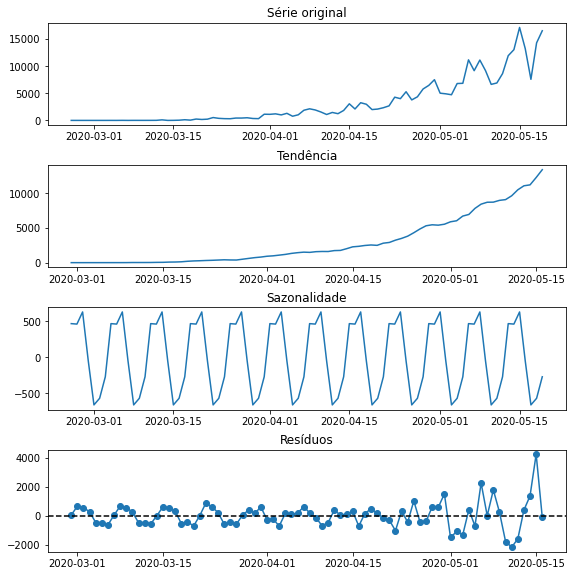

In [28]:
novoscasos = df_brasil.novoscasos
novoscasos.index = df_brasil.observationdate

Grafic_decompose(novoscasos)

Decompondo a série de casos confirmados



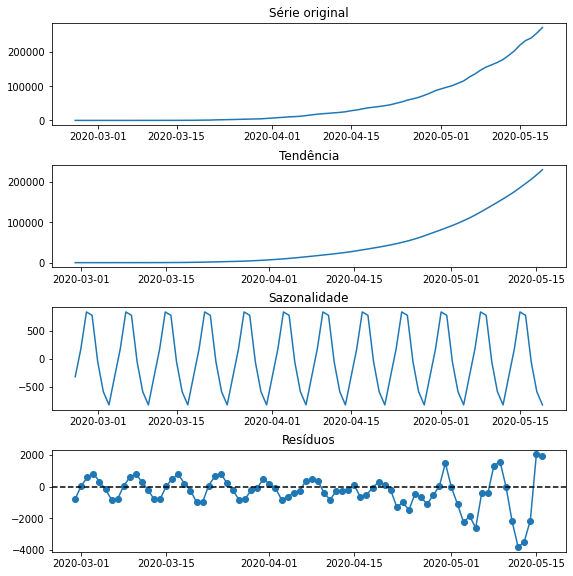

In [29]:
confirmados = df_brasil.confirmed
confirmados.index = df_brasil.observationdate

Grafic_decompose(confirmados)

#### Predizendo o número de casos confirmados com um AUTO-ARIMA

In [30]:
from pmdarima.arima import auto_arima

In [31]:
modelo = auto_arima(confirmados)

In [32]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observed', mode='lines+markers'
))
fig.add_trace(go.Scatter(x=confirmados.index, y = modelo.predict_in_sample(), name='Predicted'))

data_inicial=pd.to_datetime('2020-05-20')
data_final  =pd.to_datetime('2020-06-04')
n = (data_final - data_inicial).days
fig.add_trace(go.Scatter(x=pd.date_range(data_inicial, data_final), y=modelo.predict(n), name='Forecast'))

fig.update_layout(title=f'Previsão de casos confirmados para os próximos {n} dias',
                  yaxis_title='Casos confirmados', xaxis_title='Data',
                  margin=dict(l=30, r=30, t=50, b=5),
                  width=1100, height=400, font=dict(size=14))
fig.show()

#### Forecasting com Prophet

In [33]:
!pip3 install fbprophet

In [34]:
from fbprophet import Prophet

In [35]:
#preparando os dados:
train = confirmados.reset_index()[:-5]
test  = confirmados.reset_index()[-5:]

#renomear colunas:
train.rename(columns={'observationdate':'ds','confirmed':'y'}, inplace=True)
test.rename( columns={'observationdate':'ds','confirmed':'y'}, inplace=True)
test = test.set_index('ds')
test = test['y']

#Supondo que toda a população seja infectada:
#https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php
pop = 213481773
#pop = 1000000
train['cap'] = pop

In [36]:
train

,ds,y,cap
0,2020-02-26,1.0,213481773
1,2020-02-27,1.0,213481773
2,2020-02-28,1.0,213481773
3,2020-02-29,2.0,213481773
4,2020-03-01,2.0,213481773
...,...,...,...
74,2020-05-10,162699.0,213481773
75,2020-05-11,169594.0,213481773
76,2020-05-12,178214.0,213481773
77,2020-05-13,190137.0,213481773


In [37]:
#Modelo:
profeta = Prophet(growth="logistic", changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

#Treinar o modelo:
profeta.fit(train)

#Construindo previsões para o futuro:
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil (supondo que toda a população seja infectada)',
                  yaxis_title='Casos confirmados', xaxis_title='Data',
                  margin=dict(l=30, r=30, t=80, b=5), width=1100, height=400, font=dict(size=14))
fig.show()

____________
____________